## ANUMAAN - SARDAR PATEL INSTITUTE OF TECHNOLOGY

### Kshitij Parab
### Vansh Jain
### Sharvari Kalgutkar

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Roboto")
sns.set_style("whitegrid")
sns.color_palette("pastel")
sns.set_context("paper", font_scale=1.4)  


In [173]:
data1=pd.read_excel("Case Data.xlsx",sheet_name="Data")

In [174]:
data1

,Log in Date,Market,User ID,Sales
0,2011-01-01,Africa,TB-112801,5047
1,2011-01-01,APAC,JH-159851,6628
2,2011-01-01,EMEA,AT-7352,1254
3,2011-01-01,EU,EM-141402,8240
4,2011-01-02,America,MM-72602,4060
...,...,...,...,...
25501,2014-12-31,LATAM,TD-209953,9746
25502,2014-12-31,America,CC-124304,2982
25503,2014-12-31,America,EB-139754,4595
25504,2014-12-31,America,JM-155804,1155


## Dataset  Information

In [175]:
data1.shape

(25506, 4)

In [176]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25506 entries, 0 to 25505
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Log in Date  25506 non-null  datetime64[ns]
 1   Market       25506 non-null  object        
 2   User ID      25506 non-null  object        
 3   Sales        25506 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 797.2+ KB


In [177]:
data1.describe()

,Sales
count,25506.000000
mean,5501.111307
std,2599.712090
min,1000.000000
25%,3250.000000
50%,5479.500000
75%,7753.000000
max,10000.000000


In [178]:
data1["Market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'America', 'LATAM'], dtype=object)

In [179]:
data1["Market"].value_counts()

APAC       5417
America    5197
EU         5100
LATAM      4971
EMEA       2537
Africa     2284
Name: Market, dtype: int64

In [180]:
data1["User ID"].nunique()

4873

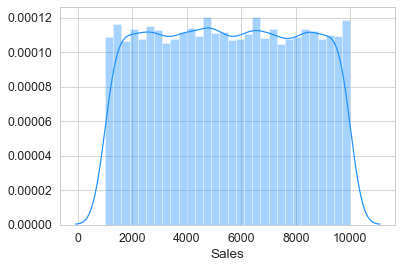

In [181]:
sns.distplot(data1["Sales"],color='dodgerblue')

## Market Performance

In [182]:
regions=pd.read_csv("C:/Users/Rajesh/ISO-3166-Countries-with-Regional-Codes-master/all/all.csv")

In [183]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [184]:
regions["sub-region"].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', nan, 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Northern America', 'South-eastern Asia', 'Eastern Asia',
       'Melanesia', 'Micronesia', 'Central Asia'], dtype=object)

In [185]:
regions["sub-region"].nunique()

17

In [186]:
dic={"APAC":['Southern Asia','Polynesia','Australia and New Zealand','Eastern Asia','Central Asia','Melanesia','Micronesia','South-eastern Asia'],
    "EMEA":["Western Asia","Northern Africa"],
    "Africa":["Sub-Sahara Africa"],
    "America":["Northern America"],
    "LATAM":["Latin America and the Caribbean"],
    "EU":["Northern Europe", "Southern Europe",'Western Europe','Eastern Europe']}

In [187]:
code=pd.DataFrame(columns=["Market"],data=data1["Market"].unique())

In [188]:
code["sub-region"]=[dic[x] for x in code["Market"]]
code

,Market,sub-region
0,Africa,[Sub-Sahara Africa]
1,APAC,"[Southern Asia, Polynesia, Australia and New Z..."
2,EMEA,"[Western Asia, Northern Africa]"
3,EU,"[Northern Europe, Southern Europe, Western Eur..."
4,America,[Northern America]
5,LATAM,[Latin America and the Caribbean]


In [189]:
code=code.explode("sub-region")
code

,Market,sub-region
0,Africa,Sub-Sahara Africa
1,APAC,Southern Asia
1,APAC,Polynesia
1,APAC,Australia and New Zealand
1,APAC,Eastern Asia
1,APAC,Central Asia
1,APAC,Melanesia
1,APAC,Micronesia
1,APAC,South-eastern Asia
2,EMEA,Western Asia


In [190]:
finalcode=pd.merge(code, regions, on='sub-region')

In [191]:
finalcode=finalcode[["Market","alpha-3"]]

In [192]:
finalcode[finalcode["Market"]=="APAC"]["alpha-3"].unique()

array(['AFG', 'BGD', 'BTN', 'IND', 'IRN', 'MDV', 'NPL', 'PAK', 'LKA',
       'ASM', 'COK', 'PYF', 'NIU', 'PCN', 'WSM', 'TKL', 'TON', 'TUV',
       'WLF', 'AUS', 'CXR', 'CCK', 'HMD', 'NZL', 'NFK', 'CHN', 'HKG',
       'JPN', 'PRK', 'KOR', 'MAC', 'MNG', 'TWN', 'KAZ', 'KGZ', 'TJK',
       'TKM', 'UZB', 'FJI', 'NCL', 'PNG', 'SLB', 'VUT', 'GUM', 'KIR',
       'MHL', 'FSM', 'NRU', 'MNP', 'PLW', 'UMI', 'BRN', 'KHM', 'IDN',
       'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM'],
      dtype=object)

In [193]:
marketsales=data1.groupby("Market").sum()

In [194]:
marketsales=marketsales.reset_index()

In [195]:
marketsales=pd.merge(marketsales,finalcode,on="Market")

In [196]:
marketsales[marketsales["Market"]=="APAC"]["alpha-3"].unique()

array(['AFG', 'BGD', 'BTN', 'IND', 'IRN', 'MDV', 'NPL', 'PAK', 'LKA',
       'ASM', 'COK', 'PYF', 'NIU', 'PCN', 'WSM', 'TKL', 'TON', 'TUV',
       'WLF', 'AUS', 'CXR', 'CCK', 'HMD', 'NZL', 'NFK', 'CHN', 'HKG',
       'JPN', 'PRK', 'KOR', 'MAC', 'MNG', 'TWN', 'KAZ', 'KGZ', 'TJK',
       'TKM', 'UZB', 'FJI', 'NCL', 'PNG', 'SLB', 'VUT', 'GUM', 'KIR',
       'MHL', 'FSM', 'NRU', 'MNP', 'PLW', 'UMI', 'BRN', 'KHM', 'IDN',
       'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM'],
      dtype=object)

In [197]:
  

import chart_studio.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
  

init_notebook_mode(connected = True) 
  
  

data = dict(
        type = 'choropleth',
        locations = marketsales["alpha-3"],
        z=marketsales["Sales"],
        colorscale="viridis",
        colorbar = {'title' : ' Total Market Sales - World Wide'},
      )
layout = dict(
    title = 'Total Sales Performance across various Market (2011-2014)',
    geo = dict(
            showframe = False,
            projection = {'type':'natural earth'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [198]:
data1=pd.read_excel("Case Data.xlsx",sheet_name="Data")
data1['Year'] = pd.DatetimeIndex(data1['Log in Date']).year

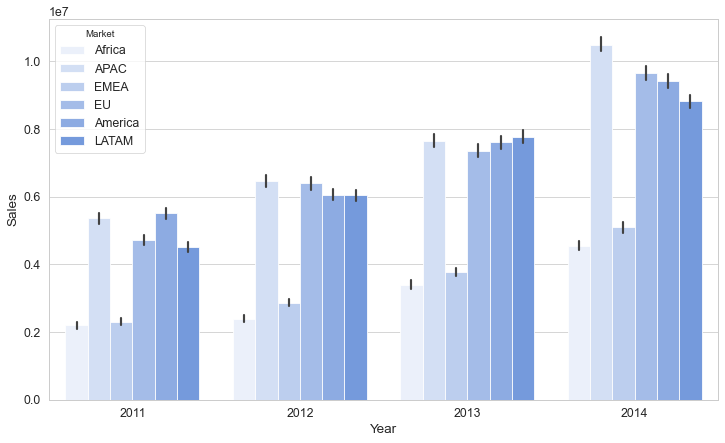

In [199]:
plt.figure(figsize=(12,7))

sns.barplot(x="Year",y='Sales',data=data1,hue="Market",estimator=sum,color="cornflowerblue")


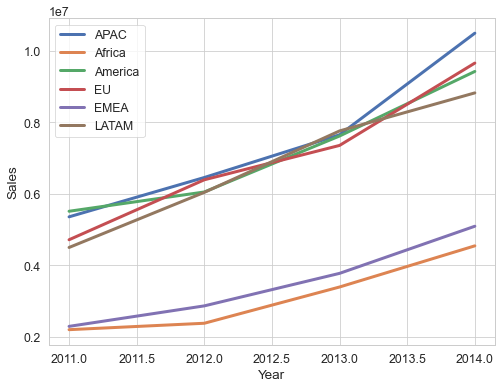

In [200]:
mp=data1.groupby(["Market","Year"]).sum()
plt.figure(figsize=(8,6))
sns.lineplot(x=mp.loc["APAC"].index,y=mp.loc["APAC"]["Sales"],lw=3,label="APAC")
sns.lineplot(x=mp.loc["Africa"].index,y=mp.loc["Africa"]["Sales"],lw=3,label="Africa")
sns.lineplot(x=mp.loc["America"].index,y=mp.loc["America"]["Sales"],lw=3,label="America")
sns.lineplot(x=mp.loc["EU"].index,y=mp.loc["EU"]["Sales"],lw=3,label="EU")
sns.lineplot(x=mp.loc["EMEA"].index,y=mp.loc["EMEA"]["Sales"],lw=3,label="EMEA")
sns.lineplot(x=mp.loc["LATAM"].index,y=mp.loc["LATAM"]["Sales"],lw=3,label="LATAM")


## CUSTOMER LOYALTY AND RETENTION 

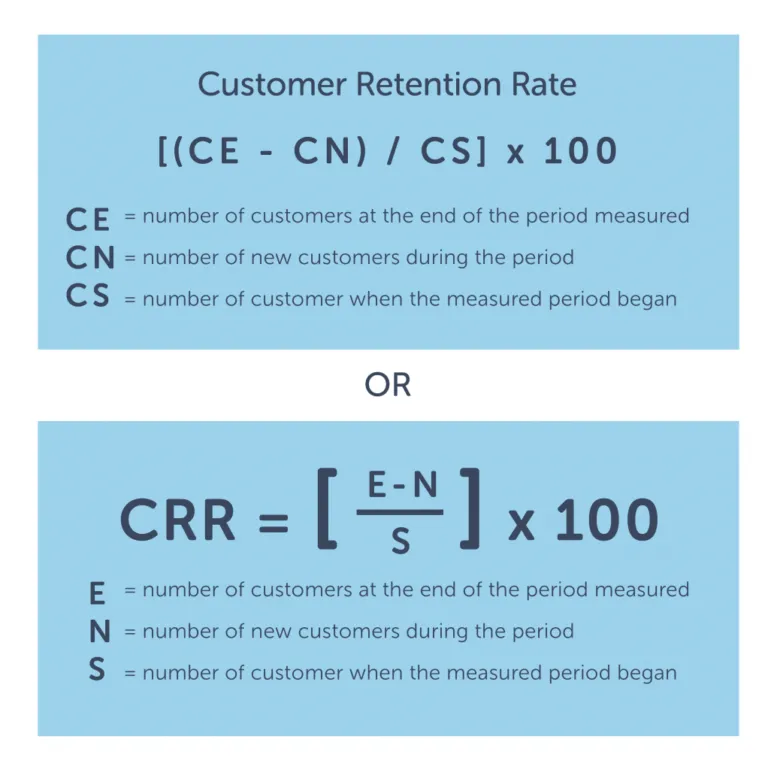

In [201]:
data1["frequency"]=1

In [202]:
data1

,Log in Date,Market,User ID,Sales,Year,frequency
0,2011-01-01,Africa,TB-112801,5047,2011,1
1,2011-01-01,APAC,JH-159851,6628,2011,1
2,2011-01-01,EMEA,AT-7352,1254,2011,1
3,2011-01-01,EU,EM-141402,8240,2011,1
4,2011-01-02,America,MM-72602,4060,2011,1
...,...,...,...,...,...,...
25501,2014-12-31,LATAM,TD-209953,9746,2014,1
25502,2014-12-31,America,CC-124304,2982,2014,1
25503,2014-12-31,America,EB-139754,4595,2014,1
25504,2014-12-31,America,JM-155804,1155,2014,1


In [203]:
retention=data1.groupby(["Market","User ID"]).sum()

In [204]:
retention

Sales   Year  frequency
Market User ID                           
APAC   AA-103151  14822  10066          5
       AA-103751  28159   8051          4
       AA-104801  27362  10064          5
       AA-106451  80929  24154         12
       AB-100151  44937  18117          9
...                 ...    ...        ...
LATAM  XP-218653  20928  10064          5
       YC-218953  26539   8046          4
       YS-218803  45256  14088          7
       ZC-219103  36886  12079          6
       ZD-219253  16673   6039          3

[4873 rows x 3 columns]

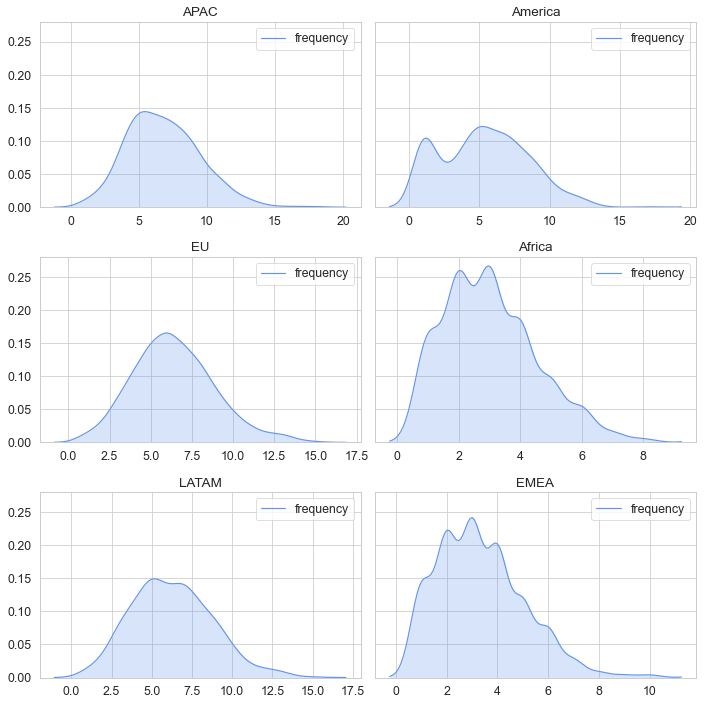

In [205]:
fig, ax = plt.subplots(3,2,figsize=(10,10),sharey=True)
sns.kdeplot(retention.loc["APAC"]["frequency"],ax=ax[0][0],shade=True,color="cornflowerblue")
ax[0][0].set_title("APAC")
sns.kdeplot(retention.loc["America"]["frequency"],ax=ax[0][1],shade=True,color="cornflowerblue")
ax[0][1].set_title("America")
sns.kdeplot(retention.loc["EU"]["frequency"],ax=ax[1][0],shade=True,color="cornflowerblue")
ax[1][0].set_title("EU")
sns.kdeplot(retention.loc["Africa"]["frequency"],ax=ax[1][1],shade=True,color="cornflowerblue")
ax[1][1].set_title("Africa")
sns.kdeplot(retention.loc["LATAM"]["frequency"],ax=ax[2][0],shade=True,color="cornflowerblue")
ax[2][0].set_title("LATAM")
sns.kdeplot(retention.loc["EMEA"]["frequency"],ax=ax[2][1],shade=True,color="cornflowerblue")
ax[2][1].set_title("EMEA")
plt.tight_layout()

In [206]:
values=[]
def retentionavg():
    for i in data1["Market"].unique():
        retentionmarket=retention.loc[i]
        print(i,":",retentionmarket["frequency"].sum()/len(retentionmarket))
        values.append(retentionmarket["frequency"].sum()/len(retentionmarket))
        

In [207]:
Market_unique=data1.Market.unique()

In [208]:
retentionavg()

Africa : 3.029177718832891
APAC : 6.805276381909548
EMEA : 3.338157894736842
EU : 6.415094339622642
America : 5.335728952772074
LATAM : 6.260705289672544


Text(0.5, 1.0, 'Average Customer frequency for each market')

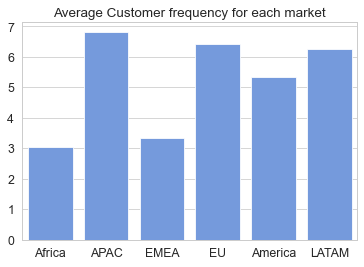

In [209]:
sns.barplot(x=Market_unique,y=values,color="cornflowerblue")
plt.title("Average Customer frequency for each market")

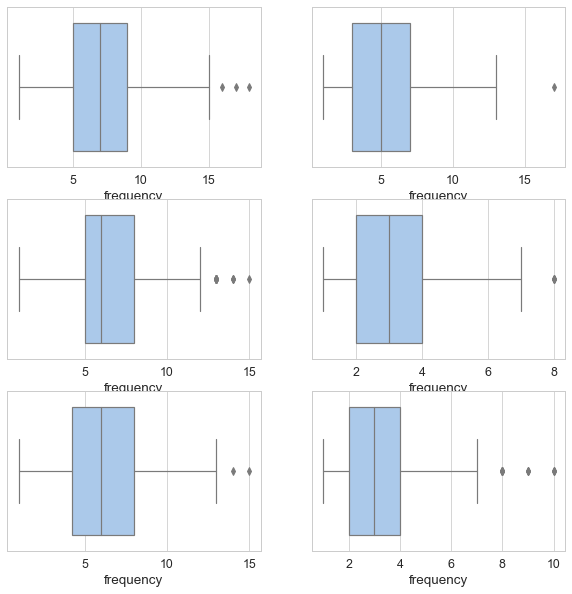

In [210]:
fig, ax = plt.subplots(3,2,figsize=(10,10),sharey=True)
sns.boxplot(retention.loc["APAC"]["frequency"],ax=ax[0][0],palette="pastel")
sns.boxplot(retention.loc["America"]["frequency"],ax=ax[0][1],palette="pastel")
sns.boxplot(retention.loc["EU"]["frequency"],ax=ax[1][0],palette="pastel")
sns.boxplot(retention.loc["Africa"]["frequency"],ax=ax[1][1],palette="pastel")
sns.boxplot(retention.loc["LATAM"]["frequency"],ax=ax[2][0],palette="pastel")
sns.boxplot(retention.loc["EMEA"]["frequency"],ax=ax[2][1],palette="pastel")


In [211]:
r=retention.reset_index('User ID')

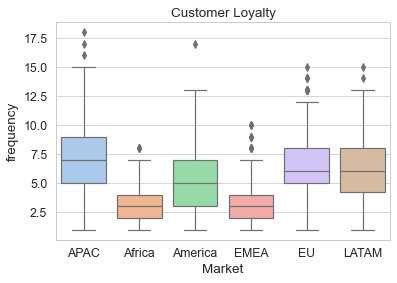

In [212]:
sns.boxplot(x=r.index,y=r.frequency,palette="pastel")
plt.title('Customer Loyalty')
plt.show()

In [213]:
df_11_12=[]
df_12_13=[]
df_13_14=[]
def cal_CRR(df,start,end):
    for i in Market_unique:
        Set1=set(data1[(data1['Year']==start) & (data1['Market']==i)]['User ID'].unique())
        Set1
        Set2=set(data1[(data1['Year']==end) & (data1['Market']==i)]['User ID'].unique())
        Set2
        CE=len(Set2)
        CN=len(Set2-Set1)
        CS=len(Set1)
        ((CE-CN)/CS)* 100
        df.append(((CE-CN)/CS)* 100)

In [214]:
cal_CRR(df_11_12,2011,2012)

In [215]:
df_11_12

[39.40397350993378,
 80.06993006993007,
 47.11246200607903,
 75.046904315197,
 69.57210776545166,
 72.27533460803059]

In [216]:
cal_CRR(df_12_13,2012,2013)


In [217]:
df_12_13

[54.848484848484844,
 82.56,
 60.483870967741936,
 83.61204013377926,
 73.42995169082126,
 85.04347826086956]

In [218]:
cal_CRR(df_13_14,2013,2014)
df_13_14

[65.36697247706422,
 92.08523592085236,
 69.85138004246284,
 88.27067669172932,
 80.8972503617945,
 86.43815201192251]

In [219]:
retentionyears=pd.DataFrame(columns=["Markets"],data=Market_unique)

In [220]:
retentionyears["years"]="2011-2012"

In [221]:
retentionyears["Rate"]=df_11_12

In [222]:
retentionyears20122013=pd.DataFrame(columns=["Markets"],data=Market_unique)
retentionyears20122013["years"]="2012-2013"

In [223]:
retentionyears20122013["Rate"]=df_12_13

In [224]:
retentionyears20132014=pd.DataFrame(columns=["Markets"],data=Market_unique)
retentionyears20132014["years"]="2013-2014"
retentionyears20132014["Rate"]=df_13_14

In [225]:
finalretention=pd.concat([retentionyears,retentionyears20122013,retentionyears20132014])


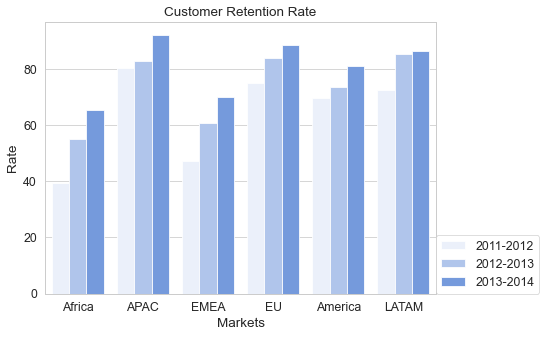

In [226]:
#Customer Retention Rate
plt.figure(figsize=(7,5))
sns.barplot(hue=finalretention["years"],y=finalretention["Rate"],x=finalretention["Markets"],color="cornflowerblue")


plt.title('Customer Retention Rate')
plt.legend(loc=(1,0))

plt.show()

## RFM analysis

In [227]:
!pip install squarify


In [228]:
data1=pd.read_excel("Case Data.xlsx",sheet_name="Data")
data1["frequency"]=1

In [229]:
Monetary=data1.groupby(['Market','User ID']).sum()

In [231]:
mon=[]
def monetary():
    for i in Market_unique:
        mon.append(Monetary.loc[i]['Sales'].sum()/len(Monetary.loc[i]))
        

In [232]:
monetary()
mon

[16603.43633952255,
 37622.427135678394,
 18455.86842105263,
 35358.25157232704,
 29357.938398357288,
 34148.614609571785]

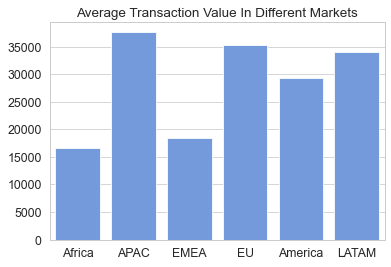

In [233]:

sns.barplot(x=Market_unique,y=mon,color="cornflowerblue")
plt.title('Average Transaction Value In Different Markets')
plt.show()

In [254]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score_sum'] <=4:
        return 'Can\'t Lose Them'
    elif (df['RFM_Score_sum'] <= 5) :
        return 'Champions'
    elif (df['RFM_Score_sum'] <= 6) :
        return 'Loyal'
    elif (df['RFM_Score_sum'] <= 7) :
        return 'Potential'
    elif (df['RFM_Score_sum'] <= 9) :
        return 'Promising'
    elif (df['RFM_Score_sum'] <=11 ) :
        return 'Needs Attention'
    else:
        return 'Require Activation'


Tree Map : Squarify Plot for RFM analysis

In [255]:
import squarify as sq
def plot_rfm():
    for i in Market_unique:
        PRESENT=data1[data1['Market']==i]['Log in Date'].max()
        rfm=data1[data1['Market']==i].drop(['Market'],axis=1)
        Recency= rfm.groupby('User ID').agg({'Log in Date': lambda date: (PRESENT - date.max()).days, 
                                        'Sales': lambda price: price.sum()})
        Recency=Recency.reset_index()
        r=retention.loc[i]
        r=r.reset_index()
        result=pd.merge(Recency,r,on='User ID')
        rfm=result.drop('Sales_x',axis=1)
        rfm=rfm.drop('Year',axis=1)
        rfm=rfm.set_index('User ID')
        rfm.columns=['Recency','Monetary_value','Frequency']
        rfm['Recency'] = rfm['Recency'].astype(int)
        rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
        rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
        rfm['m_quartile'] = pd.qcut(rfm['Monetary_value'], 4, ['4','3','2','1'])
        rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
        rfm[rfm['RFM_Score']=='111'].sort_values('Monetary_value', ascending=False).head()
        rfm['RFM_Score_sum'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
        rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
        rfm_plot_values = rfm.groupby('RFM_Level').agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary_value': ['mean', 'count']
        }).round(1)   
        # Define rfm_level function
   
        rfm_plot_values.columns = rfm_plot_values.columns.droplevel(level=0)
        rfm_plot_values.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
        values=[round(x*100/rfm_plot_values['Count'].sum(),2) for x in rfm_plot_values['Count']]
        #Create our plot and resize it.
        fig = plt.gcf()
        ax = fig.add_subplot()
        fig.set_size_inches(10, 6)
        sq.plot(sizes=rfm_plot_values['Count'], 
                      label=['Can\'t Lose Them',
                             'Champions',
                             'Loyal',
                             'Needs Attention',
                             'Potential', 
                             'Promising', 
                     'Require Activation'],value=values, alpha=.4 , color=['turquoise','gold','coral','plum','palegreen','lemonchiffon','cyan'])
        plt.title("RFM Segments -  "+i,fontsize=18,fontweight="bold")
        plt.axis('off')
        plt.show()

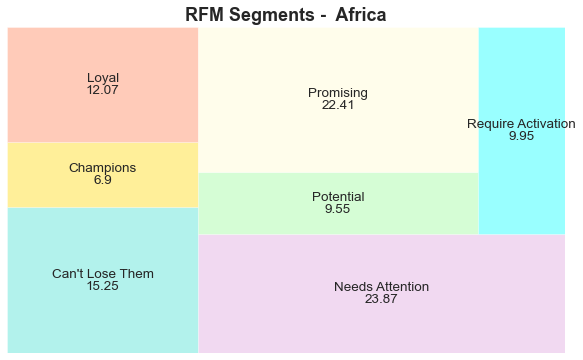

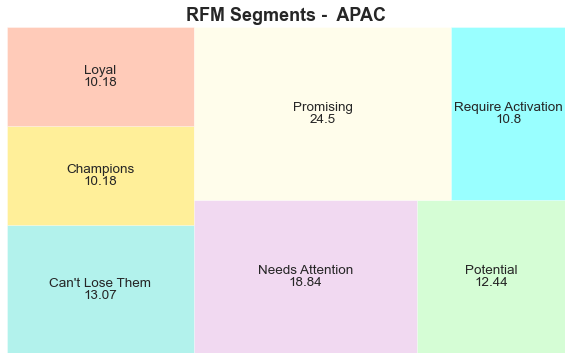

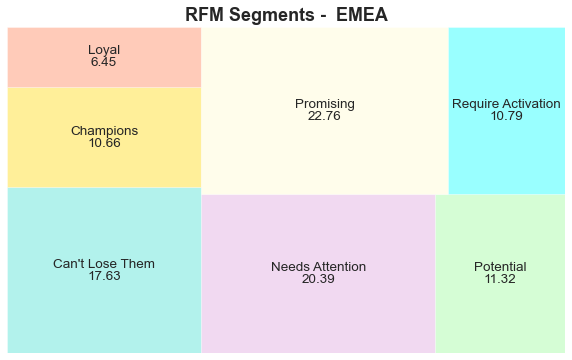

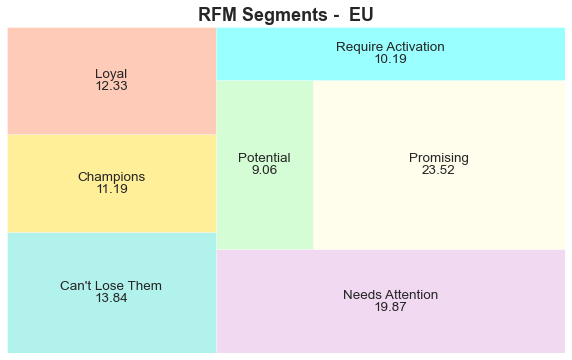

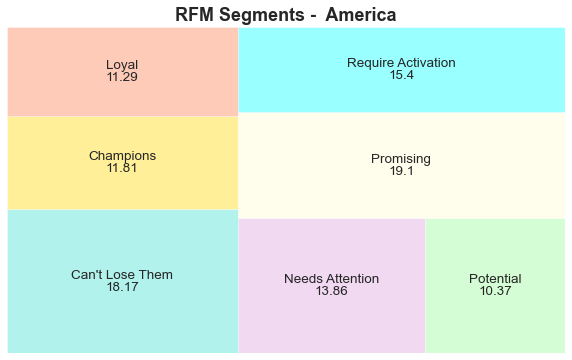

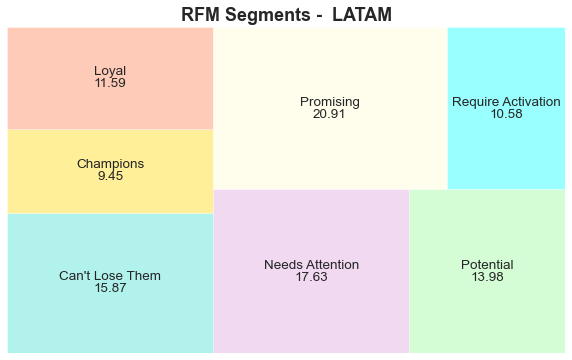

In [256]:
plot_rfm()

## SEASONALITY 

In [262]:
data1=pd.read_excel("Case Data.xlsx",sheet_name="Data")
data1['Year'] = pd.DatetimeIndex(data1['Log in Date']).year

In [263]:
data1['Month'] = pd.to_datetime(data1["Log in Date"],format='%m').dt.month

In [264]:
month={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}


In [265]:
seasonal=data1.groupby(["Market","Year","Month"]).sum()

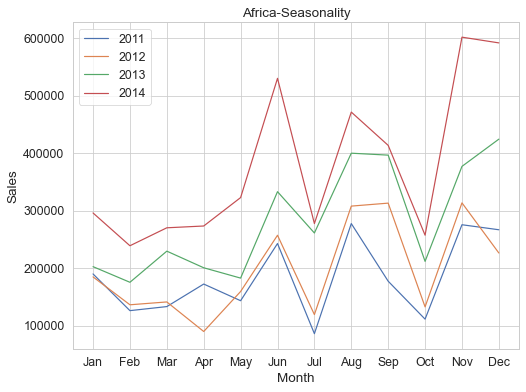

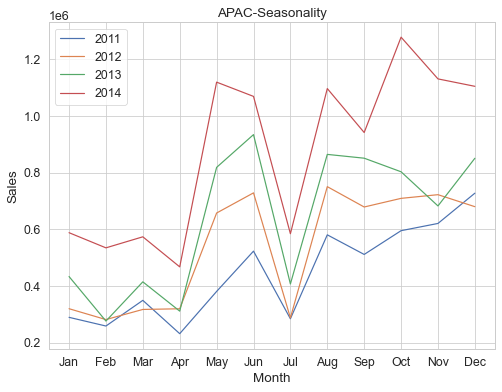

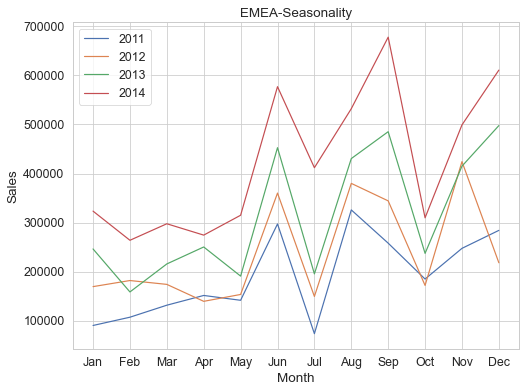

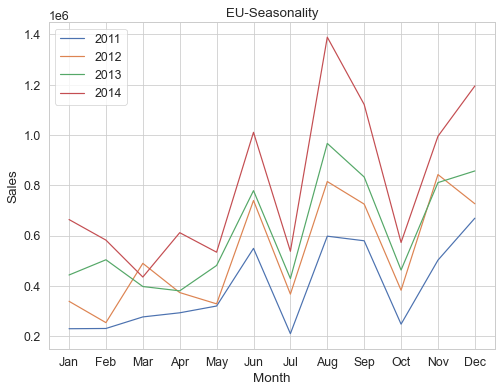

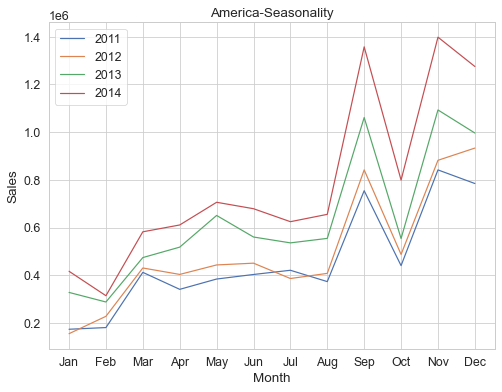

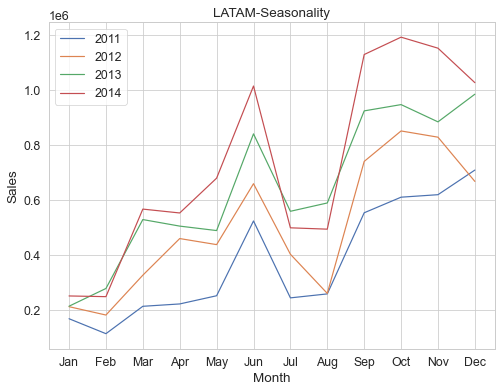

In [266]:

for i in Market_unique:
    plt.figure(figsize=(8,6))
    for j in [2011,2012,2013,2014]:
        
        sns.lineplot(x=[month[x] for x in seasonal.loc[i].loc[j].index],y=seasonal.loc[i].loc[j].Sales,data=data1,sort=False,palette="pastel")
        plt.title(i+"-Seasonality")
        plt.xlabel("Month")
        plt.legend([2011,2012,2013,2014])
    plt.show()